In [27]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np

In [33]:
ancillas = QuantumRegister(2, "ancilla")
qubits = QuantumRegister(3, "q")
results = ClassicalRegister(5, "out")

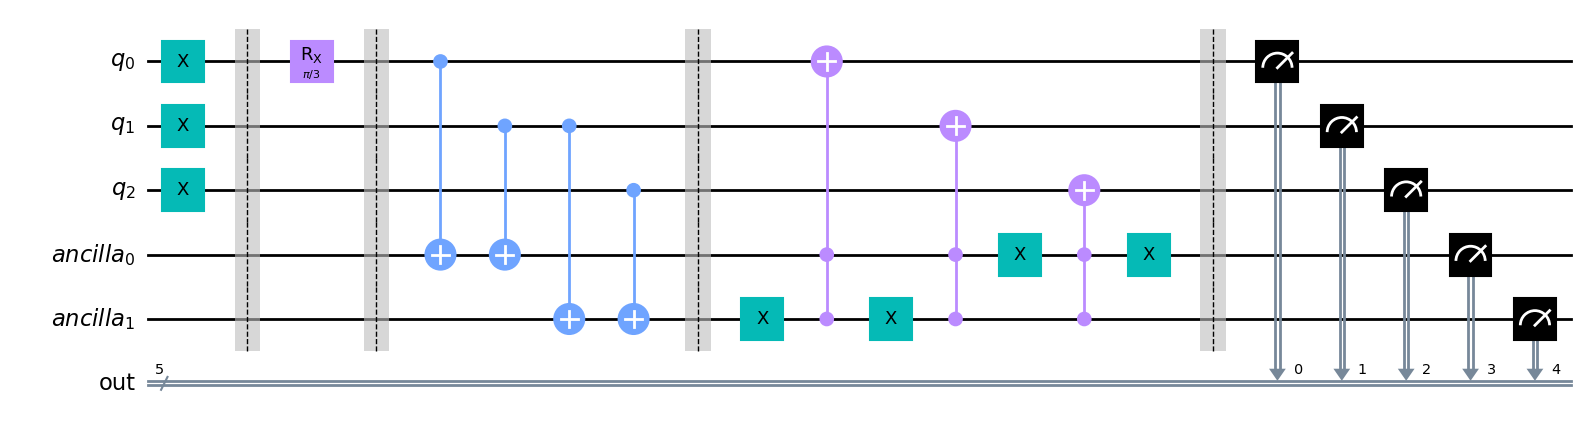

In [47]:
qc = QuantumCircuit(qubits, ancillas, results) 

qc.x(qubits) 

qc.barrier()

qc.rx(np.pi / 3, qubits[0])

qc.barrier()
qc.cx(qubits[0], ancillas[0])
qc.cx(qubits[1], ancillas[0])
qc.cx(qubits[1], ancillas[1])
qc.cx(qubits[2], ancillas[1])

qc.barrier()

qc.x(ancillas[1])
qc.toffoli(ancillas[0], ancillas[1], qubits[0])
qc.x(ancillas[1])

qc.toffoli(ancillas[0], ancillas[1], qubits[1])

qc.x(ancillas[0])
qc.toffoli(ancillas[0], ancillas[1], qubits[2])
qc.x(ancillas[0])
qc.barrier()

qc.measure(qubits, results[:3])
qc.measure(ancillas, results[3:])

qc.draw("mpl")

In [48]:
sim = Aer.get_backend("aer_simulator")
sim.run(qc).result().get_counts()

{'00111': 745, '01111': 279}